# 4th Update - Identify the movers

In [5]:
import pandas as pd
import sys
#DIR = "/Users/fangzeqiang/Desktop/Dissertation/"
DIR = sys.path[0]
df = pd.read_csv(DIR + "/fame_OC_tech_firm.csv", low_memory = True)
df.head()

/Users/fangzeqiang/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,28,41,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,registered_number,incorporation_date,dissolution_date,latest_accounts_cash,latest_accounts_assets,latest_accounts_liabilities,year_obs,...,pcds,cty,laua,ctry,rgn,ttwa,pct,lep1,lep2,is_tech
0,0,451,451,06199872,2007-04-02,NaN,NaN,15785.0,NaN,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,1,1033,1033,11896710,NaN,NaN,NaN,NaN,NaN,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,11,3229,3229,SC041753,1965-02-19,NaN,NaN,NaN,NaN,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,21,4274,4274,12125173,NaN,NaN,NaN,NaN,NaN,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,22,4541,4541,11968595,NaN,NaN,NaN,NaN,NaN,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [6]:
# drop the first 3 columns and the last one
df_1 = df.copy()
df_1 = df_1.drop({"Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1","is_tech"},axis = 1)
df_1.head()

,registered_number,incorporation_date,dissolution_date,latest_accounts_cash,latest_accounts_assets,latest_accounts_liabilities,year_obs,sic_year,sic4,change_sic,...,pcd2,pcds,cty,laua,ctry,rgn,ttwa,pct,lep1,lep2
0,06199872,2007-04-02,NaN,NaN,15785.0,NaN,2017,2007.0,8622.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11896710,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SC041753,1965-02-19,NaN,NaN,NaN,NaN,2018,2007.0,2013.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12125173,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11968595,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# columns' name
df_1.columns.to_list()

['registered_number',
 'incorporation_date',
 'dissolution_date',
 'latest_accounts_cash',
 'latest_accounts_assets',
 'latest_accounts_liabilities',
 'year_obs',
 'sic_year',
 'sic4',
 'change_sic',
 'id',
 'jurisdiction_code',
 'name',
 'normalised_name',
 'registered_addresspostal_code',
 'company_type',
 'year_accounts',
 'registeredname',
 'incorporationdate',
 'companieshousestatus',
 'primaryaddresspostcodeifuk',
 'alltradingaddressespostcodeifuk',
 'siccodes2007',
 'istheultimateparent',
 'numberofchildcompanies',
 'companieshousenumbersofchildcomp',
 'numberofcompaniesinitscorporates',
 'companieshousenumbersofcompanies',
 'bh_dummy',
 'bh_notmerged',
 'oc',
 'string',
 'keep',
 'merge_max_anna',
 'max_anna',
 'company_name',
 'bvd_id',
 'primary_uk_sic_2007',
 'nr_employees_last_avail_yr',
 'ro_full_postcode',
 'ro_country',
 'guo_bvd_id',
 'guo_name',
 'guo_direct_share',
 'duo_bvd_id',
 'duo_name',
 'duo_direct_share',
 'merge_fame',
 'fame',
 'sample',
 'birth_year',
 'dis

Which one last for long time? refer to github wiki:https://github.com/fang-zeqiang/CASA0012-Dissertation/wiki/Second-Meeting

Entry/exit patterns across clusters (dynamics or 'churn' of firms).

- What are the differences in dynamism across tech clusters in the UK?

- What are the tech clusters with the best survival rates for firms?

- What are the linkages, if any, between firm churn / survival / cluster outcomes? (e.g. size, firm performance)



For the first question: What are the differences in dynamism across tech clusters in the UK?

How to define the cluster? There is no latitude and longitude.

In [10]:
# to identify the unique value?

def show_all_unique_value(df):
    j = 0
    for i in df:
        print( str(j) + ". " + str(i) + "\n")
        j = j + 1
        print(df[str(i)].unique())
        print("------------------------------------------------------------------------------------\n")
        
# show_all_unique_value(df_1)

## 1. Life of Tech Firms

Count the time between incorporation date

Prerequisites：
       
   incorporation date & dissolution date are not `null`
   
   to fit this missing value, we need to find the missing value

In [8]:
print("date")
total = df_1.shape[0]
print(df_1["incorporation_date"].isnull().sum()/total)
print(df_1["dissolution_date"].isnull().sum()/total)

date
0.17286668691163073
0.9980494755775655


In [9]:
print("year")
total = df_1.shape[0]
print(df_1["birth_year"].isnull().sum()/total)
print(df_1["diss_year"].isnull().sum()/total)

year
0.17286668691163073
0.9980494755775655


Key finding:

1. There are **17%** companies lacking of incorporation date
2. But there are **99%** companies having no dissolution date

In [12]:
df_1['merge_max_anna'].unique()
# print(df_1["diss_year"].isnull().sum()/total)

array([ 1.,  3., nan])

This value of merge_max_anna seems meaningless

In [11]:
show_all_unique_value(df_1)

0. registered_number

['06199872' '11896710' 'SC041753' ... 'SC388753' 'SC567313' 'SC601989']
------------------------------------------------------------------------------------

1. incorporation_date

['2007-04-02' nan '1965-02-19' ... '1967-05-10' '1979-08-15' '1942-10-15']
------------------------------------------------------------------------------------

2. dissolution_date

[nan '2016-06-21' '2016-12-27' '2018-05-01' '2016-07-12' '2018-04-17'
 '2018-01-09' '2018-09-04' '2017-03-28' '2016-09-20' '2016-11-01'
 '2017-12-19' '2017-06-06' '2018-06-19' '2016-07-26' '2018-09-25'
 '2017-01-24' '2017-12-05' '2016-08-23' '2018-10-09' '2018-06-05'
 '2018-01-02' '2018-07-10' '2016-11-15' '2018-04-24' '2016-11-29'
 '2017-08-29' '2017-03-21' '2018-01-16' '2018-08-28' '2017-07-25'
 '2018-08-21' '2016-12-06' '2017-10-10' '2016-08-30' '2017-08-08'
 '2018-03-27' '2005-02-01' '2017-07-18' '2017-11-21' '2016-07-19'
 '2018-09-11' '2018-10-23' '2016-05-24' '2017-04-25' '2015-11-17'
 '2018-05-08' '20

Then we can create a table that some columns can be used!

spatial info: 
    
- Postcode
- Pcd2
- Pcds
- cty (city?)
- Laua (what is laua)
- Ctry (country?)
- Rgn (region?)
- Ttwa (ward?)
- pct?

Then take a missing value finding to dig more info
    
quantitative info:
    
- corporate_date
- diss_date


### 1.1 Missing Value Detecting

In [13]:
total = df_1.isnull().sum().sort_values(ascending=False)
percent = (df_1.isnull().sum()/df_1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.style

,Total,Percent
dissolution_date,512706,0.998049
diss_year,512706,0.998049
companieshousenumbersofchildcomp,512703,0.998044
incorporationdate,508225,0.989327
alltradingaddressespostcodeifuk,508107,0.989097
primaryaddresspostcodeifuk,508104,0.989091
numberofchildcompanies,508104,0.989091
companieshousenumbersofcompanies,508104,0.989091
numberofcompaniesinitscorporates,508104,0.989091
registeredname,508104,0.989091


Then, we can drop some columns that having too many missing value.

And consider what is **MSOA** ? (E020...)

In [ ]:
df_2 = df_1.copy()

df_2 = df_2.drop({"","",""},axis=1)

## 2. UK Tech Cluster (Lit Review)

ref1: https://www.bbc.com/news/technology-37380696

![1](https://ichef.bbci.co.uk/news/976/cpsprodpb/FA93/production/_91274146_tech_jobs_locations_v4.png)

![2](https://ichef.bbci.co.uk/news/976/cpsprodpb/CC4C/production/_91300325_tech_jobs_proportional_final_v3.png)

ref2: https://theodi.org/article/new-rankings-show-uks-most-innovative-tech-clusters/

A new UK Tech Innovation Index, published by The Data City, shows the most active innovation communities in the UK by innovation categories, captured in an interactive map

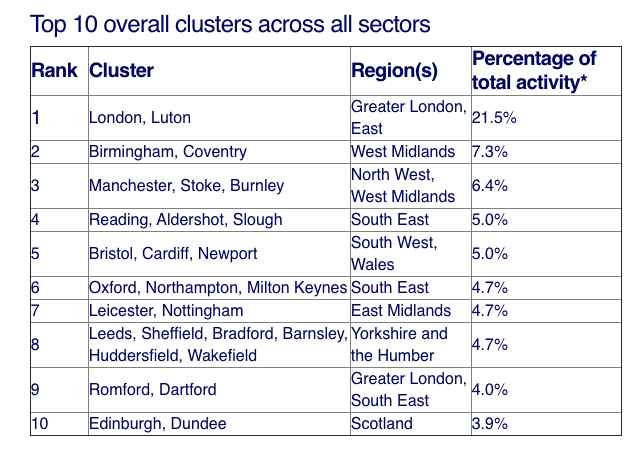

*total activity is based on all relevant events, businesses and papers identified in the index

There is an interactive map: http://thedatacity.com/products/uk-tech-innovation-index-2/?options=true&datagroup=Artificial%20intelligence%20and%20data&location=null

If the location of firms can be identified like city, then I can label the cluster. (By City OR Region)

---

# 3rd Update - Identify the Tech Industry

Before identifing the movers, it is important to filter data by specific industries(tech industry).

In [1]:
# dfp = df processed
import pandas as pd
DIR = "/Users/fangzeqiang/Desktop/Dissertation/"
dfp_fame_OC = pd.read_csv(DIR + "fame_OC_dropna_uksic7.csv")

/Users/fangzeqiang/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,13,14,15,16,17,19,20,21,22,23,25,27,29,33,40,41,55,56,57,58,59,60,61,62,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
dfp = dfp_fame_OC.copy()
dfp.head()

,Unnamed: 0,Unnamed: 0.1,registered_number,incorporation_date,dissolution_date,latest_accounts_cash,latest_accounts_assets,latest_accounts_liabilities,year_obs,sic_year,...,pcd2,pcds,cty,laua,ctry,rgn,ttwa,pct,lep1,lep2
0,451,451,06199872,2007-04-02,NaN,NaN,15785.0,NaN,2017,2007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1033,1033,11896710,NaN,NaN,NaN,NaN,NaN,2018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1290,1290,10673845,2017-03-16,NaN,NaN,NaN,NaN,2018,2007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1310,1310,00344297,1938-09-14,NaN,5.0,NaN,NaN,2017,2007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1578,1578,09814400,2015-10-07,NaN,NaN,95826.0,NaN,2017,2007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458550 entries, 0 to 2458549
Data columns (total 66 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   Unnamed: 0.1                      int64  
 2   registered_number                 object 
 3   incorporation_date                object 
 4   dissolution_date                  object 
 5   latest_accounts_cash              float64
 6   latest_accounts_assets            float64
 7   latest_accounts_liabilities       float64
 8   year_obs                          int64  
 9   sic_year                          float64
 10  sic4                              float64
 11  change_sic                        float64
 12  id                                float64
 13  jurisdiction_code                 object 
 14  name                              object 
 15  normalised_name                   object 
 16  registered_addresspostal_code     ob

### Missing Data Finding

In [3]:
# inspect the missing data columns
import numpy as np
import pandas as pd

df = dfp.copy()

# Data cleaning
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [4]:
missing_data

,Total,Percent
companieshousenumbersofchildcomp,2453989,0.998145
dissolution_date,2453863,0.998094
diss_year,2453863,0.998094
incorporationdate,2443331,0.993810
alltradingaddressespostcodeifuk,2443030,0.993687
...,...,...
guo_bvd_id,0,0.000000
primary_uk_sic_2007,0,0.000000
bvd_id,0,0.000000
company_name,0,0.000000


In [11]:
# change the data types
dfp.primary_uk_sic_2007.astype("int32")

0          86220
1          26600
2          43390
3          90020
4          70229
           ...  
2458545    55100
2458546    43999
2458547    81300
2458548    82990
2458549     4120
Name: primary_uk_sic_2007, Length: 2458550, dtype: int32

### Import 2007 SIC CODE

How to recoginse the tech firms?

Read the tech companies which is detected by www.ons.gov.uk

Then Get the sic_code_2007 i.e. 5 digitals code 

These sic code can help to recognise the tech companies.

ref: https://www.ons.gov.uk/businessindustryandtrade/business/businessinnovation/datasets/scienceandtechnologyclassification

![tech_category](https://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/resources/apx1constituentsofsntclassification_tcm77-395062.png)

In [5]:
df_sic7_tech = pd.read_csv(DIR + "sic_code_tech.csv")

In [6]:
# df_sic7_tech.style
df_sic7_tech.head()

,SIC07 type,SIC07 Section,SIC07 code,5-digit SIC07 code,SIC07 heading,Lowest-level SIC07 identifier,Science and Technology indicator,Science and Technology category,Science and Technology topic
0,Sub-class,C,19.20/1,19201,Mineral oil refining,1,4,Other scientific/technological manufacture,Chemical & Chemical Product manufacturing (exc...
1,Sub-class,C,19.20/9,19209,Other treatment of petroleum products (excludi...,1,4,Other scientific/technological manufacture,Chemical & Chemical Product manufacturing (exc...
2,Class,C,20.11,20110,Manufacture of industrial gases,1,4,Other scientific/technological manufacture,Chemical & Chemical Product manufacturing (exc...
3,Class,C,20.12,20120,Manufacture of dyes and pigments,1,4,Other scientific/technological manufacture,Chemical & Chemical Product manufacturing (exc...
4,Class,C,20.13,20130,Manufacture of other inorganic basic chemicals,1,4,Other scientific/technological manufacture,Chemical & Chemical Product manufacturing (exc...


### Recognise the tech companies

In [7]:
tech_sic_code = df_sic7_tech[["5-digit SIC07 code"]]
tech_sic_code = tech_sic_code.rename(columns={"5-digit SIC07 code":'sic07_code'})
tech_sic_code.astype("int32")

,sic07_code
0,19201
1,19209
2,20110
3,20120
4,20130
...,...
163,95110
164,95120
165,95210
166,95220


In [8]:
# dfp is the raw data

dfp['is_tech'] = dfp['primary_uk_sic_2007'].isin(tech_sic_code.sic07_code)

In [9]:
dfp_tech = dfp[dfp['is_tech']==1]

The cleaned raw data's rows and columns number:

In [32]:
dfp.shape

(2458550, 67)

The shape of cleaned tech firm data is:

In [33]:
dfp_tech.shape

(513708, 67)

In [35]:
a = dfp_tech.shape[0]/dfp.shape[0]
a

0.20894755038538976

There are almost **20%** firms in the raw data belonging to tech firms, according to the method of category as metioned above.

In [10]:
# export the tech industry firm
dfp_tech.to_csv(DIR + "fame_OC_tech_firm.csv")

# 2nd Update 

## Comments / suggestions: 

1/ Identifying movers - as we discussed, given your proposed research question, you should check if you can identify movers in the data as is (e.g. can you see time-varying address information for firms). If yes, great. If no, let me know - I will see if there's another cut of the data that would permit this. If there isn't, we can try and reshape the research question a bit.

2/ Co-ordinates - you can use the ONS Postcode Directory to link postcodes to eastings/northings (specifically, of postcode centroids). The links again are https://geoportal.statistics.gov.uk/; https://en.wikipedia.org/wiki/ONS_Postcode_Directory.

3/ Industries - have a think about specific industries (e.g. tech? creative? something else?) you might want to focus the analysis on.

3/ Literature review - you should start building references (using zotero, endnote or similar) and if you can, start work on your literature review. I would start by searching for overviews of the clusters literature, e.g. I think I already mentioned this one on tech clusters: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3491774.  

4/ Ethical reflection - for Monday or before, please send me a short para of ethical reflection, explaining why the project does not need formal ethical review. 

## For our next meeting: 

~~A/ Please book a slot for our next meeting on 18/19 May, 2-4pm UK time, using https://maxnathan.youcanbook.me.~~

B/ Overview document - before our next meeting, please draft a 1-2 page overview doc. This should build on your proposal form and today's meeting, and should include: 

- research question 
- why the topic / question is important 
- any references from an initial literature search 
- datasets and where you will get these 
- tools / software you will use 
- risks and challenges and how you might meet these (we can discuss in the meeting)
- any further questions you have. 

You have already made a start on some of this, so it shouldn't take long! 

Please send this to me **by 12 May** if possible. 

# Import the dta file

In [ ]:
# Here is a little function that has been handy for me, using some pandas features that might not have been available when the question was originally posed:

import pandas as pd

def load_large_dta(fname):
    import sys

    reader = pd.read_stata(fname, iterator=True)
    df = pd.DataFrame()

    try:
        chunk = reader.get_chunk(100*1000)
        while len(chunk) > 0:
            df = df.append(chunk, ignore_index=True)
            chunk = reader.get_chunk(100*1000)
            # print('.')
            sys.stdout.flush()
    except (StopIteration, KeyboardInterrupt):
        pass

    print('\nloaded' + str(format(len(df))))

    return df

df = load_large_dta("/Users/fangzeqiang/Desktop/Dissertation/fame_OC.dta")

df.to_csv("/Users/fangzeqiang/Desktop/Dissertation/fame_OC.csv")

In [1]:
DIR = "/Users/fangzeqiang/Desktop/Dissertation/"
import pandas as pd
df_fame_OC = pd.read_csv("/Users/fangzeqiang/Desktop/Dissertation/fame_OC.csv")
df_fame_OC.head()

/Users/fangzeqiang/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,12,13,14,15,16,18,19,20,21,22,24,26,28,32,36,37,39,40,41,42,43,44,45,46,54,55,56,57,58,59,60,61,62,63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,registered_number,incorporation_date,dissolution_date,latest_accounts_cash,latest_accounts_assets,latest_accounts_liabilities,year_obs,sic_year,sic4,...,pcd2,pcds,cty,laua,ctry,rgn,ttwa,pct,lep1,lep2
0,0,00428557,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,00851482,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,02251331,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,01918723,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,01945037,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df_fame_OC.columns

Index(['Unnamed: 0', 'registered_number', 'incorporation_date',
       'dissolution_date', 'latest_accounts_cash', 'latest_accounts_assets',
       'latest_accounts_liabilities', 'year_obs', 'sic_year', 'sic4',
       'change_sic', 'id', 'jurisdiction_code', 'name', 'normalised_name',
       'registered_addresspostal_code', 'company_type', 'year_accounts',
       'registeredname', 'incorporationdate', 'companieshousestatus',
       'primaryaddresspostcodeifuk', 'alltradingaddressespostcodeifuk',
       'siccodes2007', 'istheultimateparent', 'numberofchildcompanies',
       'companieshousenumbersofchildcomp', 'numberofcompaniesinitscorporates',
       'companieshousenumbersofcompanies', 'bh_dummy', 'bh_notmerged', 'oc',
       'string', 'keep', 'merge_max_anna', 'max_anna', 'company_name',
       'bvd_id', 'primary_uk_sic_2007', 'nr_employees_last_avail_yr',
       'ro_full_postcode', 'ro_country', 'guo_bvd_id', 'guo_name',
       'guo_direct_share', 'duo_bvd_id', 'duo_name', 'duo_direc

Notice: The `company_type` may be the key thing we need :)

In [11]:
df_fame_OC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11807732 entries, 0 to 11807731
Data columns (total 65 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   registered_number                 object 
 2   incorporation_date                object 
 3   dissolution_date                  object 
 4   latest_accounts_cash              float64
 5   latest_accounts_assets            float64
 6   latest_accounts_liabilities       float64
 7   year_obs                          int64  
 8   sic_year                          float64
 9   sic4                              float64
 10  change_sic                        float64
 11  id                                float64
 12  jurisdiction_code                 object 
 13  name                              object 
 14  normalised_name                   object 
 15  registered_addresspostal_code     object 
 16  company_type                      

In [10]:
for i in df_fame_OC:
    print( str(i) + "\n")
    print(df_fame_OC[str(i)].unique())
    print("------------------------------------------------------------------------------------\n")

Unnamed: 0

[       0        1        2 ... 11807729 11807730 11807731]
------------------------------------------------------------------------------------

registered_number

['00428557' '00851482' '02251331' ... 'IE619962' 'IE491078' 'IE627810']
------------------------------------------------------------------------------------

incorporation_date

[nan '2007-01-11' '1981-01-01' ... '1952-09-05' '1899-03-02' '1893-05-10']
------------------------------------------------------------------------------------

dissolution_date

[nan '2009-04-07' '2000-10-17' ... '2003-01-11' '2014-12-14' '2004-09-01']
------------------------------------------------------------------------------------

latest_accounts_cash

[         nan 6.261400e+04 5.000000e+00 ... 7.252000e+04 1.133910e+05
 2.106416e+06]
------------------------------------------------------------------------------------

latest_accounts_assets

[         nan 1.578500e+04 7.000000e+00 ... 4.007384e+06 2.151110e+05
 3.110802e+06]
---

In [8]:
# data cleaning
dfc = df_fame_OC.copy()
dfc['siccodes2007']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
            ..
11807727   NaN
11807728   NaN
11807729   NaN
11807730   NaN
11807731   NaN
Name: siccodes2007, Length: 11807732, dtype: float64

In [14]:
# delete the rows which contains 'siccodes2007'

print(dfc.shape)

dfc = dfc.dropna(subset=["siccodes2007"])

print(dfc.shape)

(35560, 65)
(35560, 65)


In [19]:
# compare the cleaning effectness
print(df_fame_OC.shape)
print(dfc.shape)

(11807732, 65)
(35560, 65)


In [20]:
# inspect the primary_uk_sic_2007
dfc['primary_uk_sic_2007'].head()

1033    26600.0
1499        NaN
2330        NaN
4274    72190.0
4541    73110.0
Name: primary_uk_sic_2007, dtype: float64

we can see the `primary_uk_sic_2007` is the 5 digital code， so we need drop the null value in the columns `primary_uk_sic_2007`

In [22]:
print(df_fame_OC.shape)
dfc = df_fame_OC.dropna(subset = ['primary_uk_sic_2007'] ) # drop the columns by doing this !
print(dfc.shape)

(11807732, 65)
(11807732, 65)


In [24]:
dfc.shape

(2458550, 65)

In [25]:
dfc.to_csv(DIR + "fame_OC_dropna_uksic7.csv")

## Comments / suggestions: 

1. Identifying movers - as we discussed, given your proposed research question, you should check if you can identify movers in the data as is (e.g. can you see time-varying address information for firms). If yes, great. If no, let me know - I will see if there's another cut of the data that would permit this. If there isn't, we can try and reshape the research question a bit.

    to identify movers --- can you see time-varying address information for firms?
    
        id1, time1, address1
        id2, time2, address2
        id1 = id2
        time1 < time2
        address1 != address2
        
    first, I store the data in the mysql
    

2. Co-ordinates - you can use the ONS Postcode Directory to link postcodes to eastings/northings (specifically, of postcode centroids). The links again are https://geoportal.statistics.gov.uk/; https://en.wikipedia.org/wiki/ONS_Postcode_Directory.

    to link postcodes ...

3. Industries - have a think about specific industries (e.g. tech? creative? something else?) you might want to focus the analysis on.

    tech and how to identify the tech company? is there any evidence for this category of firm.

3. Literature review - you should start building references (using zotero, endnote or similar) and if you can, start work on your literature review. I would start by searching for overviews of the clusters literature, e.g. I think I already mentioned this one on tech clusters: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3491774.  

    tech cluster

4. Ethical reflection - for Monday or before, please send me a short para of ethical reflection, explaining why the project does not need formal ethical review. 

    Ethical reflection

        All dissertations are required to include a clear Statement of Ethics. This should be included in a separate subsection – as part of the methodology, for example. 
        The length and details of the Statement of Ethics will vary – for example, a study which makes physiological measurements on people, or collects or uses sensitive information from people, may need a full ethics application, which could be explained briefly and the full application presented in appendix. 
        In other cases CASA students may be dealing with issues of deanonymisation or privacy, for example, and they would need to explain potential risks or storing and analysing the data, and how they have mitigated against these risks. 
        In other cases, students may be working with aggregate, anonymous public data, which would only require a brief reference to how disclosure or privacy issues have been dealt with by the data collectors. 
        Ethical  reflection  is  categorised  under  the  Research  design  criterion,  and  the  absence of  a Statement of Ethics will be reflected under that category. In exceptional circumstances, a lack of ethical reflection can lead to a mark penalty across the dissertation and could lead to a fail mark. 
    
    the leakage of the employees' personal information. If there is a likelihood to leak privacy, I need to prevent this from happening at the stage of data screening.

    the discrimination of industries or job categories. The final analysis results, such as the different industry concentration in each region, may deepen some people's stereotypes and prejudices about the region. It is necessary to point out and declare the objectivity of the analysis and the non-absoluteness of the results in the disclaimer. Consider the feelings of people and governments in different parts of London, and prevent the substitution of personal preferences and subjective emotions.

    The leakage of companies' name and information. For example, in the reflection of the results section of academic research, the name and related information of the companies that moved may be revealed. Although this information may be open to the public you need to know that this information may be used by people with other ulterior motives. It is best to desensitise the company name and information at the stage of chart presentation, such as using A, B, and C to refer to.

    
    (My project does not need to collect private information.)

    (This research does not need to scrape the data from the website.)




# 1st Update

### 1. Briefly introduce your topic - why should we care about the topic? What datasets you will use + where you'll get these? Possible methodology? 

**Topic**

The analysis of characters of moved companies in UK tech industries. 

characters might involve:
- Employee size
- Location
- Company operating years

**Reason**

For Government: 
- Attract talented people to work in UK
- Improve employment
    
For Companies: 
- Where the founder choose to start up companies
- Optimise the recruitment
     
**Method**

ML: DB-SCAN OR K-means? -> inspect the characters of moved companies

Output: Insights or Recommendation for policy

### 2. Think about what you want to do with the dissertation afterwards - is it something to show future employers, do you want to do further academic research? 

- Manipulate the big data -> increase ability in Data processing

- Visualisation: Moved firm's Origin/Destination Map -> employers -> provide business insights

- Further research: Decision Tree/Random Forest -> predict which companies may move

### 3. Ethical reflection - have a look at the ethics lecture / guidance and draft a couple of sentences. Will your project need formal ethical approval or not?

**First**
N/A
individuals
public info
API - all data - register
reflection

A Short Paragraph
for Ethical ...
by the next Mon

# Thing to do

**ER** - Mon

**LR**

**EDA**

Proposal

Slot -> longer

Overview weekly report

# Data Overview

* FAME_OC: master data, all variables [~15gb] 
* OC_1.1: extract of firms with true location info (trading addresses) [<1gb]
* OC_2.1: extract of firms with different trading addresses and registered addresses (may be trading address or home/other location) [<1gb]
* OC_3.1: extract of firms with only registered addresses [~10gb]

---

In [22]:
# 329MB
# 
import pandas as pd
f_1 = r'/Users/fangzeqiang/Desktop/Dissertation/OC_1.1.dta'
f_2 = r'/Users/fangzeqiang/Desktop/Dissertation/OC_2.1.dta'
OC_1_1=pd.read_stata(f_1)
OC_2_1=pd.read_stata(f_2)

# OC_1.1

In [2]:
OC_1_1.head()

,registered_number,bvd_id,id,registered_addresspostal_code,primaryaddresspostcodeifuk,alltradingaddressespostcodeifuk,sic4,birth_year,diss_year,streetnobuildingetcline1,...,country,countryisocode,regionincountry,typeofregionincountry,telephonenumber,faxnumber,addresstype,address_group,isdup_t_postcode,_merge
0,00000118,,233927.0,TN23 1DA,,,4611.0,1856.0,NaN,The New Ashford Market,...,United Kingdom,GB,England|South Eastern|Tonbridge (TN)|Ashford,Country|Region|Postal area|Town,01233506201,,Trading address,1.0,0,matched (3)
1,00000258,,12022629.0,RG12 1AN,,,7499.0,1856.0,NaN,India Buildings,...,United Kingdom,GB,England|North West|Liverpool (L)|Liverpool,Country|Region|Postal area|Town,,,Trading address,1.0,0,matched (3)
2,00000371,,2111477.0,SW1Y 6BN,,,7499.0,1863.0,NaN,St Clements House,...,United Kingdom,GB,England|Eastern|Norwich (NR)|Norwich,Country|Region|Postal area|Town,,,Trading address,1.0,0,matched (3)
3,00000402,,2302906.0,PL4 0RA,,,7499.0,1863.0,NaN,Millbay Road,...,United Kingdom,GB,England|South Western|Plymouth (PL)|Plymouth,Country|Region|Postal area|Town,01752275850,,Trading address,1.0,0,matched (3)
4,00000425,,3310625.0,EC4Y 8BB,,,NaN,1856.0,2014.0,Surrey House,...,United Kingdom,GB,England|London Outer|Kingston Upon Thames (KT)...,Country|Region|Postal area|Town,,,Trading address,1.0,0,matched (3)


### Inspect all columns' name

In [3]:
OC_1_1.columns

Index(['registered_number', 'bvd_id', 'id', 'registered_addresspostal_code',
       'primaryaddresspostcodeifuk', 'alltradingaddressespostcodeifuk', 'sic4',
       'birth_year', 'diss_year', 'streetnobuildingetcline1',
       'streetnobuildingetcline1native', 'streetnobuildingetcline2',
       'streetnobuildingetcline2native', 'streetnobuildingetcline3',
       'streetnobuildingetcline3native', 'streetnobuildingetcline4',
       'streetnobuildingetcline4native', 'postcode', 'city', 'citynative',
       'country', 'countryisocode', 'regionincountry', 'typeofregionincountry',
       'telephonenumber', 'faxnumber', 'addresstype', 'address_group',
       'isdup_t_postcode', '_merge'],
      dtype='object')

### Inspect the numeric columns

In [4]:
df = OC_1_1.copy()

import numpy as np
df.describe(include = [np.number])

,id,sic4,birth_year,diss_year,address_group,isdup_t_postcode
count,2.547690e+05,213596.000000,254737.000000,69005.000000,259581.0,259581.000000
mean,2.121576e+07,6399.244466,2000.244535,2014.631882,1.0,0.000593
std,3.874494e+07,2177.294293,15.828067,11.039440,0.0,0.162160
min,6.300000e+01,111.000000,1856.000000,8.000000,1.0,0.000000
25%,1.276526e+06,4648.000000,1995.000000,2013.000000,1.0,0.000000
50%,2.615181e+06,6810.000000,2004.000000,2015.000000,1.0,0.000000
75%,9.002524e+06,8299.000000,2011.000000,2017.000000,1.0,0.000000
max,1.687338e+08,9999.000000,2018.000000,2018.000000,1.0,78.000000


### Inspect the data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259581 entries, 0 to 259580
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   registered_number                259581 non-null  object  
 1   bvd_id                           259581 non-null  object  
 2   id                               254769 non-null  float64 
 3   registered_addresspostal_code    259581 non-null  object  
 4   primaryaddresspostcodeifuk       259581 non-null  object  
 5   alltradingaddressespostcodeifuk  259581 non-null  object  
 6   sic4                             213596 non-null  float64 
 7   birth_year                       254737 non-null  float64 
 8   diss_year                        69005 non-null   float64 
 9   streetnobuildingetcline1         259581 non-null  object  
 10  streetnobuildingetcline1native   259581 non-null  object  
 11  streetnobuildingetcline2         259581 non-null  ob

### Inspect the missing data

In [20]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                                  Total   Percent
diss_year                        190576  0.734168
sic4                              45985  0.177151
birth_year                         4844  0.018661
id                                 4812  0.018538
_merge                                0  0.000000
isdup_t_postcode                      0  0.000000
bvd_id                                0  0.000000
registered_addresspostal_code         0  0.000000
primaryaddresspostcodeifuk            0  0.000000
alltradingaddressespostcodeifuk       0  0.000000
streetnobuildingetcline1              0  0.000000
streetnobuildingetcline1native        0  0.000000
streetnobuildingetcline2              0  0.000000
streetnobuildingetcline2native        0  0.000000
streetnobuildingetcline3              0  0.000000
streetnobuildingetcline3native        0  0.000000
streetnobuildingetcline4              0  0.000000
streetnobuildingetcline4native        0  0.000000
postcode                              0  0.000000


## Questions
- what is `sic4`?
- what is `dss_year`?
- The valuable attributes are `city`, `country` sth. like addresstype thing?

postcode

### Inspect the unique values for all columns

In [21]:
# apply the unique() method to inspect data
for i in df:
    print( str(i) + "\n")
    print(df[str(i)].unique())
    print("------------------------------------------------------------------------------------\n")

registered_number

['00000118' '00000258' '00000371' ... 'ZC000150' 'ZC000164' 'ZC000169']
------------------------------------------------------------------------------------

bvd_id

['' 'GB00002065' 'GB00006480' ... 'GBSO303717' 'GBZC000150' 'GBZC000164']
------------------------------------------------------------------------------------

id

[  233927. 12022629.  2111477. ...  2728817.   473940.  2591699.]
------------------------------------------------------------------------------------

registered_addresspostal_code

['TN23 1DA' 'RG12 1AN' 'SW1Y 6BN' ... 'G2 5AB' 'EH2 1DG' 'WC2B 5RR']
------------------------------------------------------------------------------------

primaryaddresspostcodeifuk

['' 'CB6 1RA' 'PL25 4BY' ... 'EH2 2ER' 'EH6 8QP' 'EH4 3LU']
------------------------------------------------------------------------------------

alltradingaddressespostcodeifuk

['' 'CB6 1RA, CB8 8QT, IP12 1PN, NR17 2QZ, NR21 9NH'
 'PL25 4BY, BA1 1SX, BA1 2AP, BA1 2JL, BL3 3QE' ... '

In [19]:
# export the CSV file
df.to_csv("/Users/fangzeqiang/Desktop/OC_1_1.csv")

# OC_2.1

In [23]:
df_2_1 = OC_2_1.copy()

In [24]:
df_2_1.columns

Index(['registered_number', 'bvd_id', 'id', 'registered_addresspostal_code',
       'primaryaddresspostcodeifuk', 'alltradingaddressespostcodeifuk', 'sic4',
       'birth_year', 'diss_year', 'isdup_t_postcode',
       'streetnobuildingetcline1', 'streetnobuildingetcline1native',
       'streetnobuildingetcline2', 'streetnobuildingetcline2native',
       'streetnobuildingetcline3', 'streetnobuildingetcline3native',
       'streetnobuildingetcline4', 'streetnobuildingetcline4native',
       'postcode', 'city', 'citynative', 'country', 'countryisocode',
       'regionincountry', 'typeofregionincountry', 'telephonenumber',
       'faxnumber', 'addresstype', 'address_group', 'isdup_r_postcode',
       '_merge', 'pcd_fm', 'pcd_or', 'oc_2', 'oc_3', 'oc_4', 'oc_5'],
      dtype='object')

In [31]:
import numpy as np
df_2_1.describe(include = [np.number])

,id,sic4,birth_year,diss_year,isdup_t_postcode,address_group,isdup_r_postcode,oc_2,oc_3,oc_4,oc_5
count,5.997660e+05,563851.000000,599366.000000,35870.000000,0.0,642150.0,642150.0,642150.0,642150.0,642150.0,642150.0
mean,7.833705e+07,6584.146916,2011.617873,2011.572679,NaN,2.0,0.0,1.0,0.0,0.0,0.0
std,5.864128e+07,2033.171410,9.454586,4.875997,NaN,0.0,0.0,0.0,0.0,0.0,0.0
min,7.500000e+01,111.000000,1863.000000,1987.000000,NaN,2.0,0.0,1.0,0.0,0.0,0.0
25%,3.711021e+06,4791.000000,2010.000000,2009.000000,NaN,2.0,0.0,1.0,0.0,0.0,0.0
50%,8.242699e+07,6820.000000,2015.000000,2012.000000,NaN,2.0,0.0,1.0,0.0,0.0,0.0
75%,1.372014e+08,8299.000000,2017.000000,2015.000000,NaN,2.0,0.0,1.0,0.0,0.0,0.0
max,1.687339e+08,9999.000000,2018.000000,2018.000000,NaN,2.0,0.0,1.0,0.0,0.0,0.0


In [32]:
df_2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642150 entries, 0 to 642149
Data columns (total 37 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   registered_number                642150 non-null  object  
 1   bvd_id                           642150 non-null  object  
 2   id                               599766 non-null  float64 
 3   registered_addresspostal_code    642150 non-null  object  
 4   primaryaddresspostcodeifuk       642150 non-null  object  
 5   alltradingaddressespostcodeifuk  642150 non-null  object  
 6   sic4                             563851 non-null  float64 
 7   birth_year                       599366 non-null  float64 
 8   diss_year                        35870 non-null   float64 
 9   isdup_t_postcode                 0 non-null       float64 
 10  streetnobuildingetcline1         642150 non-null  object  
 11  streetnobuildingetcline1native   642150 non-null  ob

In [30]:
total = df_2_1.isnull().sum().sort_values(ascending=False)
percent = (df_2_1.isnull().sum()/df_2_1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                                  Total   Percent
isdup_t_postcode                 642150  1.000000
diss_year                        606280  0.944141
sic4                              78299  0.121933
birth_year                        42784  0.066626
id                                42384  0.066003
streetnobuildingetcline1              0  0.000000
streetnobuildingetcline3native        0  0.000000
streetnobuildingetcline3              0  0.000000
streetnobuildingetcline2native        0  0.000000
streetnobuildingetcline2              0  0.000000
streetnobuildingetcline1native        0  0.000000
oc_5                                  0  0.000000
streetnobuildingetcline4native        0  0.000000
alltradingaddressespostcodeifuk       0  0.000000
primaryaddresspostcodeifuk            0  0.000000
registered_addresspostal_code         0  0.000000
bvd_id                                0  0.000000
streetnobuildingetcline4              0  0.000000
postcode                              0  0.000000


In [29]:
# apply the unique() method to inspect data
for i in df_2_1:
    print( str(i) + "\n")
    print(df_2_1[str(i)].unique())
    print("------------------------------------------------------------------------------------\n")

registered_number

['00000295' '00000866' '00001471' ... 'ZC000159' 'ZC000184' 'ZC000187']
------------------------------------------------------------------------------------

bvd_id

['' 'GB00000866' 'GB00002899' ... 'GBSO300074' 'GBSO300293' 'GBZC000184']
------------------------------------------------------------------------------------

id

[2276915. 3246486. 2408330. ... 2274509.  755364. 3314422.]
------------------------------------------------------------------------------------

registered_addresspostal_code

['EC1Y 0TL' 'UB11 1TD' 'RH12 1XL' ... 'KA9 1PJ' 'KY11 8JS' 'FK9 5HP']
------------------------------------------------------------------------------------

primaryaddresspostcodeifuk

['' 'LE2 4AL' 'L2 3YL' ... 'EH12 9SB' 'KA15 1GA' 'EH7 8AU']
------------------------------------------------------------------------------------

alltradingaddressespostcodeifuk

['' 'LE2 4AL, LE1 7RY' 'L2 3YL' ... 'AB23 8GX, AB11 6YW'
 'KA15 1GA, KA11 5DA' 'EH7 8AU, EH2 3JG']
------------